In [ ]:
%cd "/content/drive/MyDrive/Lien/CV/Dataset1/NER"
!ls

/content/drive/MyDrive/Lien/CV/Dataset1/NER
data  L1.ipynb


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 3.3 MB 34.6 MB/s 
     |████████████████████████████████| 636 kB 47.5 MB/s 
     |████████████████████████████████| 895 kB 56.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import json

import os

path_dir = "data/training_data/annotations/"

files = os.listdir(path_dir)

print(len(files))

texts = []
labels = []

lines = []

for file in files:
    # file = "1Amy.pdf-0.json"
    f = open(path_dir + file)

    data = json.load(f)

    # print(data)

    # print(len(data))

    data = data['form']

    # print(len(data))

    # print(data[0])

    n = len(data)

    for i in range(0, n):
        d = data[i]
        
        box = d['box']
        text = d['text']
        label = d['label']
        xmin, ymin, xmax, ymax = box[0], box[1], box[2], box[3]
        line = str(xmin) + ' ' + str(ymin) + ' ' + str(xmax) + ' ' + str(ymax) + ' ' + text + ' ' + label

        lines.append(line)
    
    # lines.append('\n')


print(lines[  : 10 ])

n = len(lines)

print(n)

threshold = 50 

line_tags = []
tag = []
tags = []

inputs = []

for i in range(0, n - 1):
    
    d = lines[i]
    d_next = lines[i+1]

    if d == "\n":
        continue

    d1 = d.split()
    xmin, ymin, xmax, ymax, text, label = int(d1[0]), int(d1[1]), int(d1[2]), int(d1[3]), d1[4], d1[5]
    

    # print(xmin, ymin, xmax, ymax, text, label)

    d1_next = d_next.split()
    xmin_next, ymin_next, xmax_next, ymax_next, text_next, label_next  = int(d1_next[0]), int(d1_next[1]), int(d1_next[2]), int(d1_next[3]), d1_next[4], d1_next[5]
    # print(xmin_next, ymin_next, xmax_next, ymax_next, text_next, label_next)
    if i == 0:
        line_tags = [text]
        tag = [label]
    if xmax < xmin_next and xmin_next - xmax < threshold:
        line_tags.append(text_next)
        tag.append(label_next)
    else:
        inputs.append(line_tags)
        tags.append(tag)
        line_tags = [text_next]
        tag = [label_next]
        

        
    # break

# print(len(inputs))

for inp in inputs[: 10]:
    print(inp)

for inp in tags[: 10]:
    print(inp)


n_tags = len(tags)

# print()

for i in range(0, n_tags):
    # print()

    tag = tags[i]

    # print("tag: ", tag)
    
    for j in range(0, len(tags[i])):
        # print(t)
        if tag[j] == "other":
            tags[i][j]= "O"
        elif tag[j] == "Yan":
            tags[i][j]= "O"
        else:
            tags[i][j] = "B-" + tag[j]
    # break

# print(tags[0: 100])
sentences_train = inputs
tags_train = tags 

369
['1302 66 1473 100 Curriculum other', '1479 66 1562 100 Vitae other', '94 2186 114 2219 e other', '119 2186 191 2219 mail other', '196 2186 207 2219 : other', '214 2186 580 2219 vgowribalan@gmail.com email', '620 2186 631 2219 : other', '670 2186 1006 2219 vgowribalan@live.com email', '1154 2186 1268 2219 Mobile other', '1274 2186 1285 2219 : other']
106985
['Curriculum', 'Vitae']
['e', 'mail', ':', 'vgowribalan@gmail.com', ':', 'vgowribalan@live.com']
['Mobile', ':', '(+971)', '50', '246', '0800']
['PROFESSIONAL', 'EXPERIENCE', '14', 'YEARS']
['ROLE']
['ORGANISATION']
['TENURE']
['AVERAGE']
['RETURN']
['Head', 'of', 'Asset', 'Management']
['other', 'other']
['other', 'other', 'other', 'email', 'other', 'email']
['other', 'other', 'phone', 'phone', 'phone', 'phone']
['other', 'other', 'other', 'other']
['other']
['other']
['other']
['other']
['other']
['position', 'position', 'position', 'position']


In [ ]:
  import json

import os

path_dir = "data/testing_data/annotations/"

files = os.listdir(path_dir)

print(len(files))

texts = []
labels = []

lines = []

for file in files:
    # file = "1Amy.pdf-0.json"
    f = open(path_dir + file)

    data = json.load(f)

    # print(data)

    # print(len(data))

    data = data['form']

    # print(len(data))

    # print(data[0])

    n = len(data)

    for i in range(0, n):
        d = data[i]
        
        box = d['box']
        text = d['text']
        label = d['label']
        xmin, ymin, xmax, ymax = box[0], box[1], box[2], box[3]
        line = str(xmin) + ' ' + str(ymin) + ' ' + str(xmax) + ' ' + str(ymax) + ' ' + text + ' ' + label

        lines.append(line)
    
    # lines.append('\n')


print(lines[  : 10 ])

n = len(lines)

print(n)

threshold = 50 

line_tags = []
tag = []
tags = []

inputs = []

for i in range(0, n - 1):
    
    d = lines[i]
    d_next = lines[i+1]

    if d == "\n":
        continue

    d1 = d.split()
    xmin, ymin, xmax, ymax, text, label = int(d1[0]), int(d1[1]), int(d1[2]), int(d1[3]), d1[4], d1[5]
    

    # print(xmin, ymin, xmax, ymax, text, label)

    d1_next = d_next.split()
    xmin_next, ymin_next, xmax_next, ymax_next, text_next, label_next  = int(d1_next[0]), int(d1_next[1]), int(d1_next[2]), int(d1_next[3]), d1_next[4], d1_next[5]
    # print(xmin_next, ymin_next, xmax_next, ymax_next, text_next, label_next)
    if i == 0:
        line_tags = [text]
        tag = [label]
    if xmax < xmin_next and xmin_next - xmax < threshold:
        line_tags.append(text_next)
        tag.append(label_next)
    else:
        inputs.append(line_tags)
        tags.append(tag)
        line_tags = [text_next]
        tag = [label_next]
        

        
    # break

# print(len(inputs))

for inp in inputs[: 10]:
    print(inp)

for inp in tags[: 10]:
    print(inp)


n_tags = len(tags)

# print()

for i in range(0, n_tags):
    # print()

    tag = tags[i]

    # print("tag: ", tag)
    
    for j in range(0, len(tags[i])):
        # print(t)
        if tag[j] == "other":
            tags[i][j]= "O"
        elif tag[j] == "YAn":
            tags[i][j]= "O"
        elif tag[j] == '2':
            tags[i][j] = "O"
        elif tag[j] == 'Yi,':
            tags[i][j] = "O"
        elif tag[j] == '92384507':
            tags[i][j] = "O"
        else:
            tags[i][j] = "B-" + tag[j]
    # break

print(tags[0: 100])
sentences_val = inputs
tags_val = tags


166
['1424 2210 1480 2237 Page other', '1492 2210 1530 2237 3/3 other', '125 131 431 170 PROFESSIONAL other', '436 131 779 170 QUALIFICATIONS other', '125 213 177 241 Jun other', '182 213 247 241 2017 other', '401 212 518 241 Associate other', '522 212 550 241 of other', '553 212 601 241 The other', '606 212 674 241 Hong other']
51817
['Page', '3/3']
['PROFESSIONAL', 'QUALIFICATIONS']
['Jun', '2017']
['Associate', 'of', 'The', 'Hong', 'Kong', 'Institute', 'of', 'Chartered', 'Secretaries', '(HKICS)']
['Sep', '2014']
['Obtained', 'N2', 'Level', 'qualification', 'of', 'Japanese', 'Language', 'Proficiency', 'Test']
['Sept', '2009']
['Member', 'of', 'the', 'Hong', 'Kong', 'Institute', 'of', 'Certified', 'Public', 'Accountants', '(HKICPA)']
['EDUCATION']
['Sep', '2003', '–', 'Jul', '2006', 'Bachelor', 'of', 'Business', 'Administration', '(Major', 'in', 'Account', '&', 'Finance)']
['other', 'other']
['other', 'other']
['other', 'other']
['other', 'other', 'other', 'other', 'other', 'other', '

In [ ]:
import torch 
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertConfig
from transformers import AdamW, BertForSequenceClassification, get_linear_schedule_with_warmup


In [ ]:
len(tags_val)

7068

In [ ]:
from tqdm import tqdm, trange

In [ ]:

import pandas as pd 
import io 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_gpu = torch.cuda.device_count()

print("device: ", device)
print("n_gpu: ", n_gpu)

print(torch.cuda.get_device_name(0))

device:  cuda
n_gpu:  1
Tesla K80


In [ ]:
tag_values = []
for tag in tags_train:
  for t in tag:
    if t not in tag_values:
      tag_values.append(t)


In [ ]:
tag_values_val = []
for tag in tags_val:
  for t in tag:
    if t not in tag_values:
      tag_values_val.append(t)
tag_values_val

[]

In [ ]:
# tag_values = list(set(tags))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}

In [ ]:
tag_values

['O',
 'B-email',
 'B-phone',
 'B-position',
 'B-company_name',
 'B-company_date',
 'B-school_name',
 'B-name',
 'B-major',
 'B-school_date',
 'B-grade',
 'B-project_name',
 'PAD']

In [ ]:
tag2idx

{'B-company_date': 5,
 'B-company_name': 4,
 'B-email': 1,
 'B-grade': 10,
 'B-major': 8,
 'B-name': 7,
 'B-phone': 2,
 'B-position': 3,
 'B-project_name': 11,
 'B-school_date': 9,
 'B-school_name': 6,
 'O': 0,
 'PAD': 12}

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


torch.__version__

'1.9.0+cu111'

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
MAX_LEN = 75 # Sentence Max length
bs = 32 # Batch Size

In [ ]:
torch.cuda.is_available()

True

In [ ]:
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):
        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(str(word))
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

In [ ]:
tokenized_texts_and_labels_train = []

for sent, labs in zip(sentences_train, tags_train):
  tokenized_texts_and_labels_train.append(tokenize_and_preserve_labels(sent, labs))

In [ ]:
tokenized_texts_and_labels_val = []

for sent, labs in zip(sentences_val, tags_val):
  tokenized_texts_and_labels_val.append(tokenize_and_preserve_labels(sent, labs))

In [ ]:
# tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
# labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

In [ ]:
tokenized_texts_train = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels_train]
labels_train = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels_train]

In [ ]:
tokenized_texts_val = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels_val]
labels_val = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels_val]

In [ ]:
print(len(tokenized_texts_train))
print(len(labels_train))

17016
17016


In [ ]:
input_ids_train = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts_train],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

In [ ]:
input_ids_val = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts_val],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

In [ ]:
input_ids_train.shape

(17016, 75)

In [ ]:
input_ids_val.shape

(7068, 75)

In [ ]:
# tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
#                      maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
#                      dtype="long", truncating="post")

In [ ]:
tags_train = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels_train],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [ ]:
labels_train[0]

['O', 'O', 'O', 'O', 'O', 'O']

In [ ]:
labels_val[0]

['O', 'O', 'O', 'O']

In [ ]:
labels_val[-1]

['B-school_name', 'B-school_name', 'B-school_name', 'B-school_name']

In [ ]:
len(labels_val)

7068

In [ ]:
tags_val = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels_val],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [ ]:
labels_val[3875:3890]

[['B-company_date',
  'B-company_date',
  'B-company_date',
  'B-company_date',
  'B-company_date'],
 ['B-company_name',
  'B-company_name',
  'B-company_name',
  'B-company_name',
  'B-company_name',
  'B-company_name'],
 ['O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

In [ ]:
attention_masks_train = [[float(i>0) for i in ii] for ii in input_ids_train]

In [ ]:
attention_masks_val = [[float(i>0) for i in ii] for ii in input_ids_val]

In [ ]:
tr_inputs = torch.tensor(input_ids_train)
val_inputs = torch.tensor(input_ids_val)
tr_tags = torch.tensor(tags_train)
val_tags = torch.tensor(tags_val)
tr_masks = torch.tensor(attention_masks_train)
val_masks = torch.tensor(attention_masks_val)

In [ ]:
print(tr_inputs.shape)
print(tr_masks.shape)
print(tr_tags.shape)

torch.Size([17016, 75])
torch.Size([17016, 75])
torch.Size([17016, 75])


In [ ]:
print(val_inputs.shape)
print(val_masks.shape)
print(val_tags.shape)

torch.Size([7068, 75])
torch.Size([7068, 75])
torch.Size([7068, 75])


In [ ]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)

In [ ]:
import transformers
from transformers import BertForTokenClassification, AdamW

transformers.__version__

'4.11.3'

In [ ]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels = len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [ ]:
model.cuda()

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)

In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 3
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [ ]:
!pip install seqeval

     |████████████████████████████████| 43 kB 1.1 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=7ca1b366d36828535aaf63b8e09a0d227c1ca41abfb7bf3b350c29dd803ecd40
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [ ]:
from seqeval.metrics import f1_score, accuracy_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []

for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Put the model into training mode.
    model.train()
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)


    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    # Put the model into evaluation mode
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

    eval_loss = eval_loss / len(valid_dataloader)
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    pred_tags = [[tag_values[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]]
    valid_tags = [[tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]]
    print("Validation Accuracy: {}".format(accuracy_score(pred_tags, valid_tags)))
    print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
    print()

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Average train loss: 0.30323272905683607
Validation loss: 0.20171271319758163
Validation Accuracy: 0.9401167749130749


Epoch:  33%|███▎      | 1/3 [08:01<16:03, 481.69s/it]

Validation F1-Score: 0.7637203443208063

Average train loss: 0.15748312808765813
Validation loss: 0.21544288391272676
Validation Accuracy: 0.9437774716263203


Epoch:  67%|██████▋   | 2/3 [16:01<08:00, 480.49s/it]

Validation F1-Score: 0.7790357127245705

Average train loss: 0.10902083778396753
Validation loss: 0.20709436169795994
Validation Accuracy: 0.9466115594043167


Epoch: 100%|██████████| 3/3 [24:00<00:00, 480.16s/it]

Validation F1-Score: 0.7900905929328926



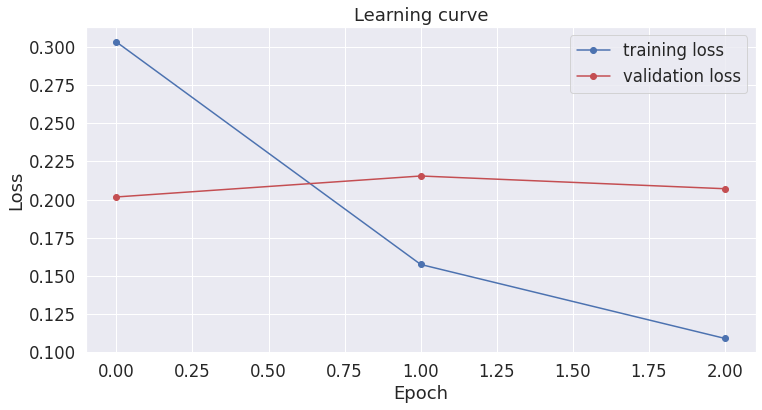

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [56]:
from seqeval.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)


In [ ]:
print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))

In [60]:
print(classification_report(pred_tags, valid_tags))

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

company_date       0.84      0.87      0.85      1763
company_name       0.78      0.79      0.78      3193
       email       0.97      0.96      0.97       890
       grade       0.95      0.59      0.73       179
       major       0.76      0.53      0.63       741
        name       0.70      0.63      0.66       578
       phone       0.96      0.92      0.94       651
    position       0.86      0.78      0.82      2165
project_name       0.00      0.00      0.00         0
 school_date       0.68      0.52      0.59       594
 school_name       0.64      0.79      0.70      1052

   micro avg       0.80      0.78      0.79     11806
   macro avg       0.74      0.67      0.70     11806
weighted avg       0.81      0.78      0.79     11806

